In [36]:
import pandas as pd
import numpy as np
import os
import pandas_profiling as pp
import streamlit as st
from streamlit_pandas_profiling import st_profile_report
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
import nltk
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

### Load ML for Good  Prolific Academic Data 
data_adult_apr_20, data_adult_apr_21, data_adult_may_20, data_adult_nov_20 

data_parent_apr_20, data_parent_apr_21, data_parent_may_20, data_parent_nov_20

In [22]:
path_to_prolific_data = "C:\\Users\\Administrator\Documents\MLforGood\ML-for-Good-Hackathon\Data\ProlificAcademic"

#April 2020Data
# Adult data
data_adult_apr_20 = pd.read_csv(path_to_prolific_data+"\April 2020\Data\CRISIS_Adult_April_2020.csv", low_memory=False) 
data_adult_apr_21 = pd.read_csv(path_to_prolific_data+"\April 2021\Data\CRISIS_Adult_April_2021.csv", low_memory=False)
data_adult_may_20 = pd.read_csv(path_to_prolific_data+"\May 2020\Data\CRISIS_Adult_May_2020.csv", low_memory=False)
#data_adult_nov_20 = pd.read_csv(path_to_prolific_data+"\November 2020\Data\CRISIS_Adult_November_2020.csv", low_memory=False)

# Parent data
data_parent_apr_20 = pd.read_csv(path_to_prolific_data+"\April 2020\Data\CRISIS_Parent_April_2020.csv", low_memory=False) 
data_parent_apr_21 = pd.read_csv(path_to_prolific_data+"\April 2021\Data\CRISIS_Parent_April_2021.csv", low_memory=False) 
data_parent_may_20 = pd.read_csv(path_to_prolific_data+"\May 2020\Data\CRISIS_Parent_May_2020.csv", low_memory=False) 
#data_parent_nov_20 = pd.read_csv(path_to_prolific_data+"\November 2020\Data\CRISIS_Parent_November_2020.csv", low_memory=False) 


### Concatenate parent data and display basic stats

In [17]:
all_parent_data = pd.concat([data_parent_apr_20,data_parent_apr_21,data_parent_may_20,data_parent_nov_20], ignore_index=True)


all_parent_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,7239.0,186.352535,2.730057,17.0,186.000000,186.0,187.0,187.000000
age,7228.0,43.086884,389.385569,0.0,34.000000,38.0,43.0,33137.000000
sex,2221.0,1.474561,0.505739,1.0,1.000000,1.0,2.0,3.000000
raceethnicity___1,3814.0,0.774777,0.417784,0.0,1.000000,1.0,1.0,1.000000
raceethnicity___2,3814.0,0.027530,0.163644,0.0,0.000000,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...
substanceproblems2,54.0,0.148148,0.358583,0.0,0.000000,0.0,0.0,1.000000
substancecomplaint2,54.0,0.037037,0.190626,0.0,0.000000,0.0,0.0,1.000000
Nov_cms_ave,775.0,2.169935,0.684103,1.0,1.700000,2.1,2.6,4.800000
Nov_cw_ave,777.0,2.173531,0.673257,1.0,1.666667,2.0,2.5,4.833333


### Concatenate parent data and display basic stats

In [20]:
all_adult_data = pd.concat([data_adult_apr_20,data_adult_apr_21, data_adult_may_20, data_adult_nov_20])


all_adult_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country,10351.0,186.342189,3.335535,17.000000,186.000000,186.000000,187.000000,187.0
age,10340.0,38.956383,14.746920,10.000000,27.000000,36.000000,51.000000,83.0
sex,2839.0,1.579429,0.501526,1.000000,1.000000,2.000000,2.000000,3.0
raceethnicity___1,5091.0,0.677274,0.467565,0.000000,0.000000,1.000000,1.000000,1.0
raceethnicity___2,5091.0,0.022392,0.147971,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...
smokesoon,190.0,3.910526,0.321035,2.000000,4.000000,4.000000,4.000000,4.0
friendscigarette,190.0,3.800000,0.536499,1.000000,4.000000,4.000000,4.000000,4.0
Nov_cms_ave,849.0,2.639694,0.796700,1.000000,2.100000,2.600000,3.100000,5.0
Nov_cw_ave,858.0,2.713481,0.747382,1.166667,2.166667,2.666667,3.166667,5.0




###  Slice data and get interactive report on basic stats

In [42]:
features = ['age', 'sex', 'country', 'gender', 'raceethnicity___1']
sliced_parent_data = all_parent_data[features]
profile = pp.ProfileReport(sliced_parent_data, title='Pandas Profiling Report')
profile.to_widgets()

### Get HTML report

In [5]:
profile.to_file('myreport.html')




### Explore data with K-Means Clustering

In [43]:
#Combine data related to raceethnicity into 1 column

all_parent_data['raceethnicity___1'] = 1*all_parent_data['raceethnicity___1'] 
all_parent_data['raceethnicity___2'] = 2*all_parent_data['raceethnicity___2'] 
all_parent_data['raceethnicity___3'] = 3*all_parent_data['raceethnicity___3'] 
all_parent_data['raceethnicity___4'] = 4*all_parent_data['raceethnicity___4'] 
all_parent_data['raceethnicity___5'] = 5*all_parent_data['raceethnicity___5'] 

all_parent_data['raceethnicity'] = all_parent_data['raceethnicity___1']+all_parent_data['raceethnicity___2']+all_parent_data['raceethnicity___3']+all_parent_data['raceethnicity___4']+all_parent_data['raceethnicity___5']

In [26]:
path_to_crisis_logger_data = "C:\\Users\\Administrator\Documents\MLforGood\ML-for-Good-Hackathon\Data\CrisisLogger\crisislogger.csv"
crisis_data = pd.read_csv(path_to_crisis_logger_data, low_memory=False) 
crisis_data.describe().transpose()
#crisis_data.columns()

,count,mean,std,min,25%,50%,75%,max
upload_id,140.0,544.607143,137.206492,10.0,452.0,542.0,669.25,758.0


0    so high our experience so far has been a littl...
1    I'm not going to stay in my name for the anony...
2    so far I have been florentines now for about a...
3    it has actually been a very difficult. Trying ...
4    so this whole situation has been strange for u...
Name: transcriptions, dtype: object


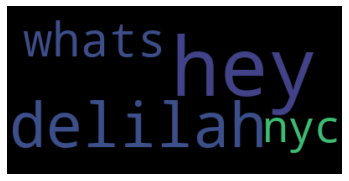

In [34]:
print(crisis_data["transcriptions"].head())
wordcloud = WordCloud().generate("hey there delilah whats it like in nyc in the the delilah how are you hey there")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

KMeans(max_iter=1000, n_clusters=7, n_init=1)
Top terms per cluster:
Cluster 0:


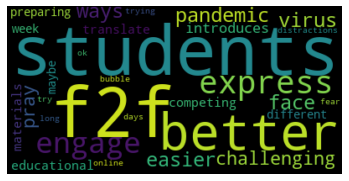

Cluster 1:


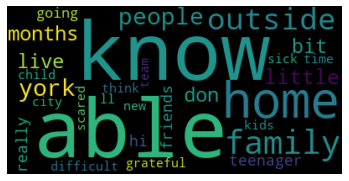

Cluster 2:


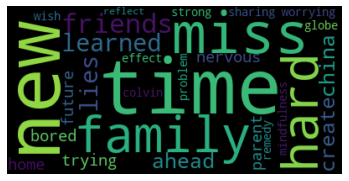

Cluster 3:


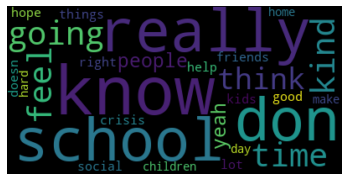

Cluster 4:


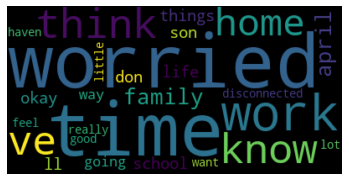

Cluster 5:


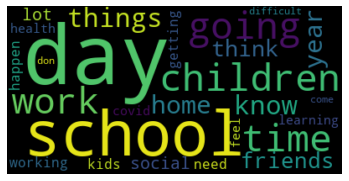

Cluster 6:


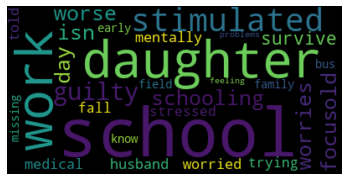



Prediction
[5]
[5]


In [54]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(crisis_data["transcriptions"])

true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

print(model)

'''for i in range(true_k):
    print()
    wordcloud = WordCloud().generate(i)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
'''

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]


for i in range(true_k):
    print("Cluster %d:" % i)
    mystr = ""
    for ind in order_centroids[i, :30]:
        mystr = mystr+ ' ' +terms[ind]
        #print(' %s' % terms[ind]),
    wordcloud = WordCloud().generate(mystr)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)
 